In [1]:
import pandas as pd
#import seaborn as sns

In [2]:
df=pd.read_csv('fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.shape

(17880, 18)

In [6]:
df.isnull().sum()/len(df)*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [7]:
cols_to_drop = [
    "job_id",        # just an ID
    "salary_range",  # ~84% missing
    "department",    # ~65% missing
]
df = df.drop(columns=cols_to_drop)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   company_profile      14572 non-null  object
 3   description          17879 non-null  object
 4   requirements         15185 non-null  object
 5   benefits             10670 non-null  object
 6   telecommuting        17880 non-null  int64 
 7   has_company_logo     17880 non-null  int64 
 8   has_questions        17880 non-null  int64 
 9   employment_type      14409 non-null  object
 10  required_experience  10830 non-null  object
 11  required_education   9775 non-null   object
 12  industry             12977 non-null  object
 13  function             11425 non-null  object
 14  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.0+ MB


In [9]:
df.isnull().sum()/len(df)*100

title                   0.000000
location                1.935123
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [10]:
text_cols = ["title","description","requirements","benefits","company_profile"]
cat_cols = ["employment_type","required_experience","required_education","industry","function","location"]

df[text_cols] = df[text_cols].fillna("")
df[cat_cols] = df[cat_cols].fillna("Unknown")


In [11]:
df.isna().sum()/len(df)*100

title                  0.0
location               0.0
company_profile        0.0
description            0.0
requirements           0.0
benefits               0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
function               0.0
fraudulent             0.0
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   company_profile      17880 non-null  object
 3   description          17880 non-null  object
 4   requirements         17880 non-null  object
 5   benefits             17880 non-null  object
 6   telecommuting        17880 non-null  int64 
 7   has_company_logo     17880 non-null  int64 
 8   has_questions        17880 non-null  int64 
 9   employment_type      17880 non-null  object
 10  required_experience  17880 non-null  object
 11  required_education   17880 non-null  object
 12  industry             17880 non-null  object
 13  function             17880 non-null  object
 14  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.0+ MB


In [13]:
df.shape

(17880, 15)

In [14]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [15]:
# List of columns to combine
text_columns = ["title", "description", "requirements", "benefits", "company_profile"]

# Combine them into a new column 'text'
df["text"] = df[text_columns].agg(" ".join, axis=1)


In [16]:
df.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0,"Marketing Intern Food52, a fast-growing, James..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production Orga...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0,Commissioning Machinery Assistant (CMA) Our cl...
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Account Executive - Washington DC THE COMPANY:...
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bill Review Manager JOB TITLE: Itemization Rev...


In [17]:
pd.set_option('display.max_colwidth', None)
print(df["text"].head())


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [18]:
df.columns

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'text'],
      dtype='object')

In [19]:
pd.set_option('display.max_colwidth', None)
print(df["text"].head())

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [20]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"&\w+;", " ", text)          # remove HTML entities
    text = re.sub(r"[^a-z0-9\s]", " ", text)   # remove everything except letters, numbers, spaces
    text = re.sub(r"\s+", " ", text)           # replace multiple spaces with single space
    return text

df["text"] = df["text"].apply(clean_text)


In [21]:
df['location'].value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
Unknown                  346
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: location, Length: 3106, dtype: int64

In [22]:
df.head()

title            location  \
0                           Marketing Intern    US, NY, New York   
1  Customer Service - Cloud Video Production      NZ, , Auckland   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3          Account Executive - Washington DC  US, DC, Washington   
4                        Bill Review Manager  US, FL, Fort Worth   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                company_profile  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.   
1                                                                                                                                                                                                                                                                                                                                                        90 Seconds, the

In [23]:
df = df.drop(columns=text_columns)


In [24]:
df.columns

Index(['location', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'text'],
      dtype='object')

In [25]:
df["credibility_score"] = (
    df["has_company_logo"] +
    df["has_questions"] -
    df["telecommuting"]
)


In [26]:
df.head()

location  telecommuting  has_company_logo  has_questions  \
0    US, NY, New York              0                 1              0   
1      NZ, , Auckland              0                 1              0   
2       US, IA, Wever              0                 1              0   
3  US, DC, Washington              0                 1              0   
4  US, FL, Fort Worth              0                 1              1   

  employment_type required_experience required_education  \
0           Other          Internship            Unknown   
1       Full-time      Not Applicable            Unknown   
2         Unknown             Unknown            Unknown   
3       Full-time    Mid-Senior level  Bachelor's Degree   
4       Full-time    Mid-Senior level  Bachelor's Degree   

                    industry              function  fraudulent  \
0                    Unknown             Marketing           0   
1  Marketing and Advertising      Customer Service           0   
2                    Unknown               Unknown           0   
3          Computer Software                 Sales           0   
4     Hospital & Health Care  Health Care Provider           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [27]:
df['credibility_score'].value_counts()

 2    7485
 1    7398
 0    2874
-1     123
Name: credibility_score, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   location             17880 non-null  object
 1   telecommuting        17880 non-null  int64 
 2   has_company_logo     17880 non-null  int64 
 3   has_questions        17880 non-null  int64 
 4   employment_type      17880 non-null  object
 5   required_experience  17880 non-null  object
 6   required_education   17880 non-null  object
 7   industry             17880 non-null  object
 8   function             17880 non-null  object
 9   fraudulent           17880 non-null  int64 
 10  text                 17880 non-null  object
 11  credibility_score    17880 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 1.6+ MB


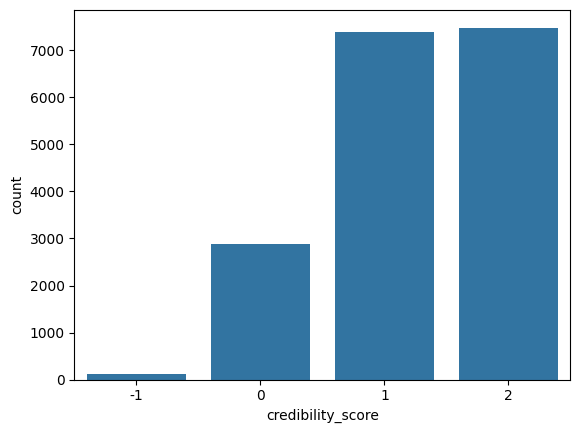

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='credibility_score', data=df)
plt.show()


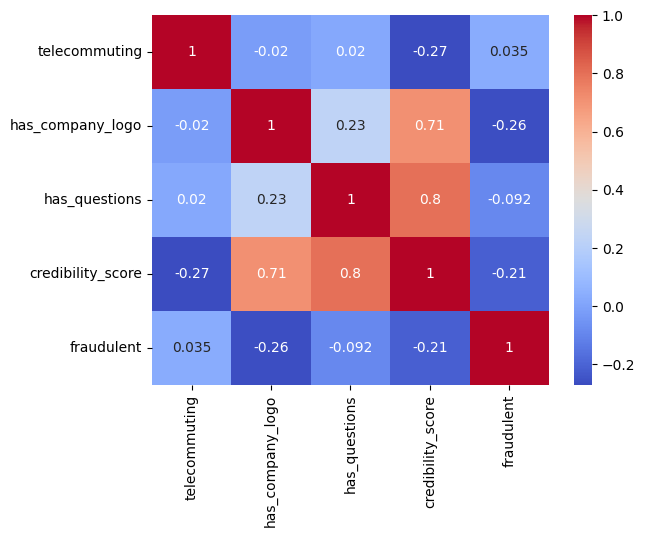

In [30]:
corr = df[['telecommuting', 'has_company_logo', 'has_questions', 'credibility_score', 'fraudulent']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [31]:
df = df.drop(['has_company_logo', 'has_questions'], axis=1)


In [32]:
corr = df[['telecommuting', 'credibility_score', 'fraudulent']].corr()
#sns.heatmap(corr, annot=True, cmap='coolwarm')

#plt.show()


In [33]:
corr

,telecommuting,credibility_score,fraudulent
telecommuting,1.000000,-0.270968,0.034523
credibility_score,-0.270968,1.000000,-0.214256
fraudulent,0.034523,-0.214256,1.000000


In [34]:
import sys
!{sys.executable} -m pip install wordcloud


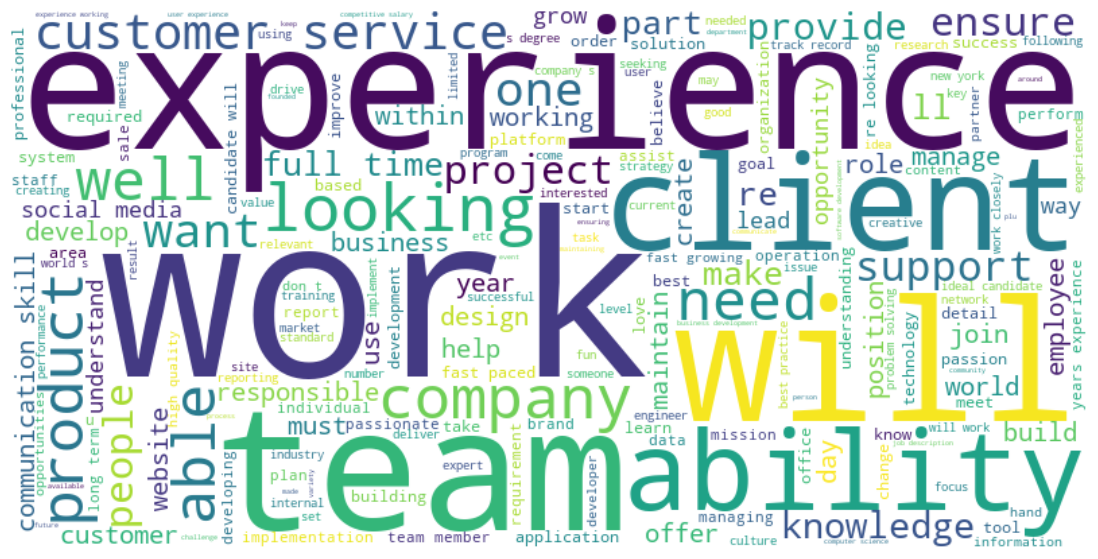

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text for non-fraudulent jobs
nonfraud_text = " ".join(df[df['fraudulent'] == 0]['text'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nonfraud_text)

# Display the WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


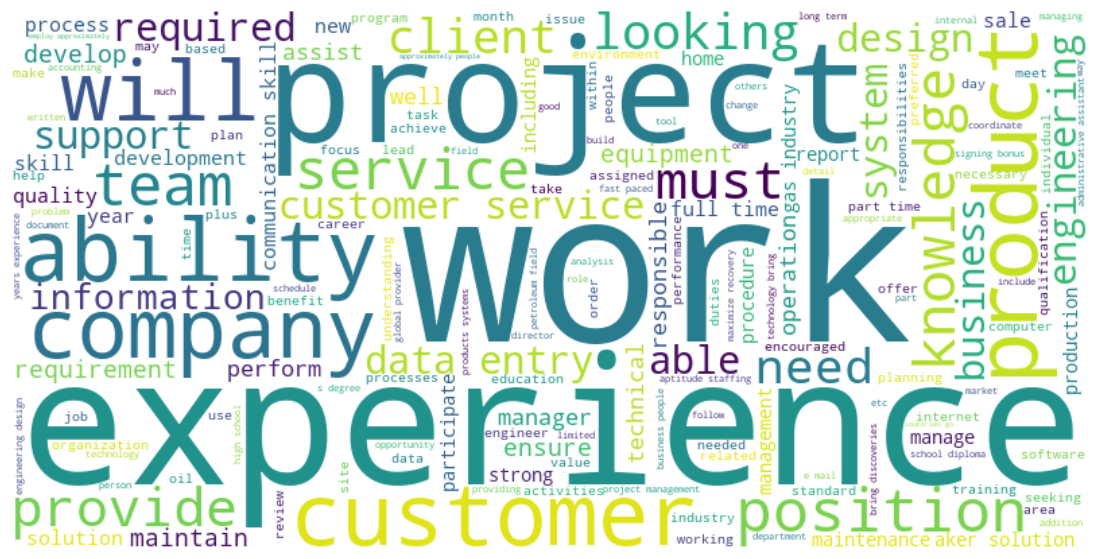

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text for non-fraudulent jobs
nonfraud_text = " ".join(df[df['fraudulent'] == 1]['text'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nonfraud_text)

# Display the WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
import sys
!{sys.executable} -m pip install seaborn

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE D

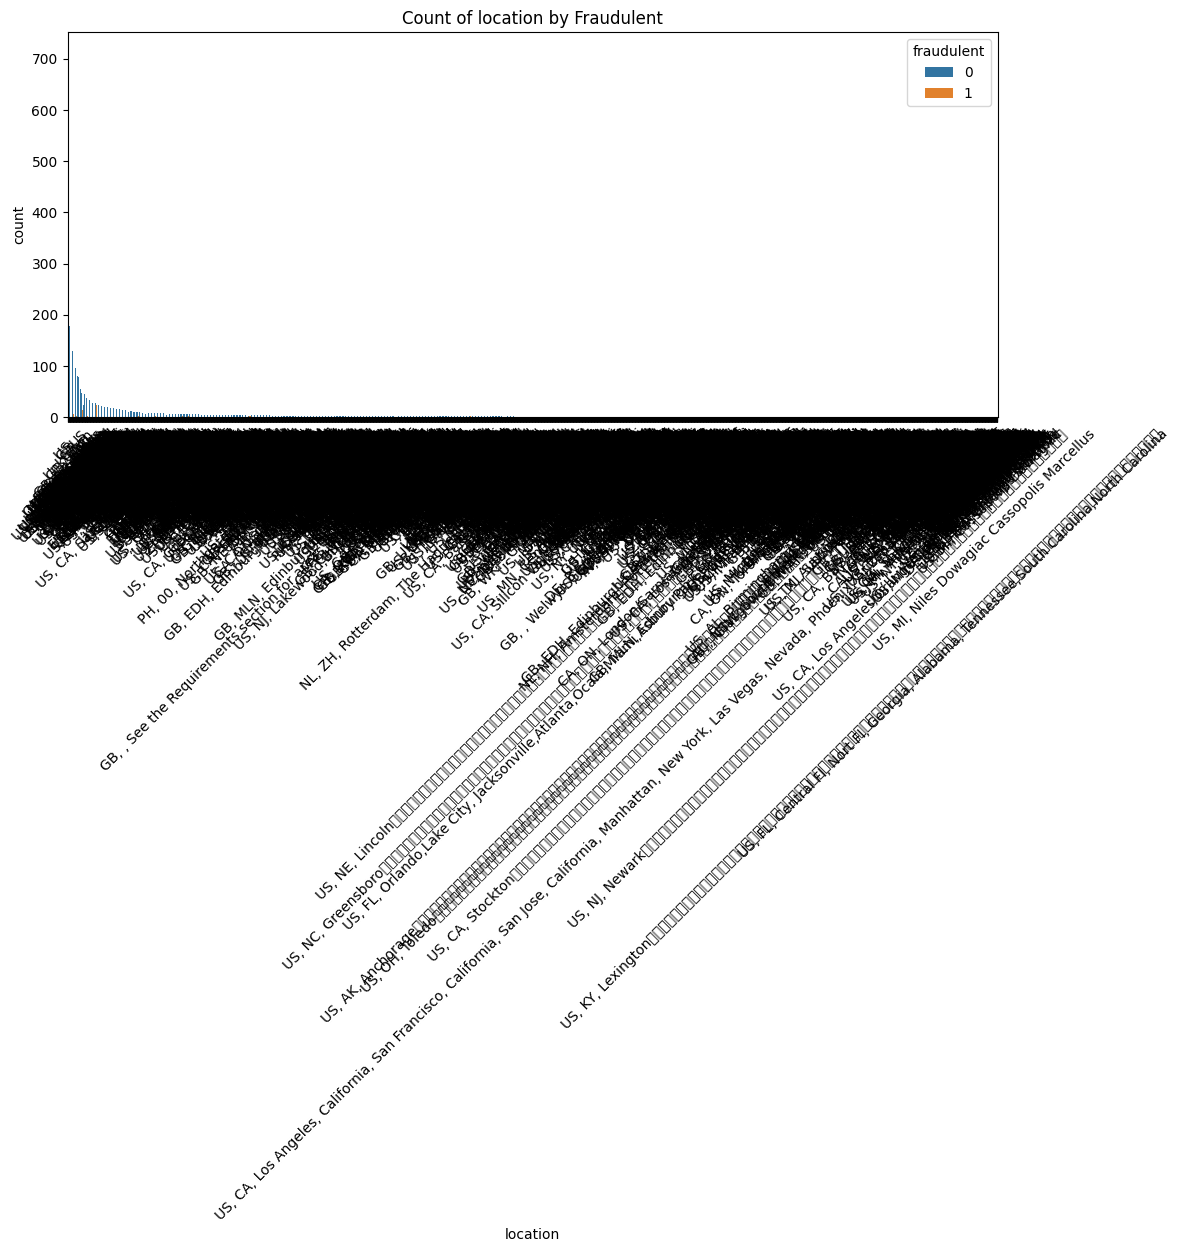

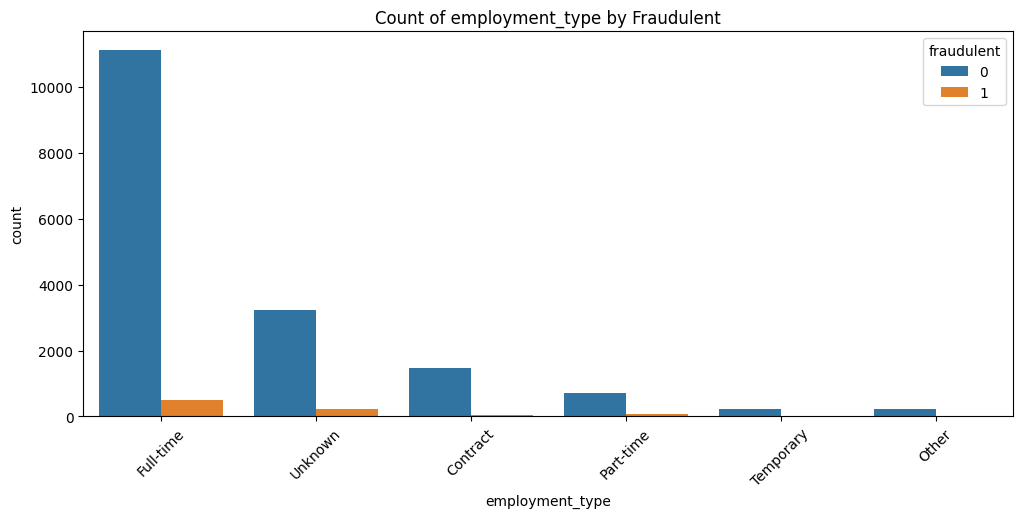

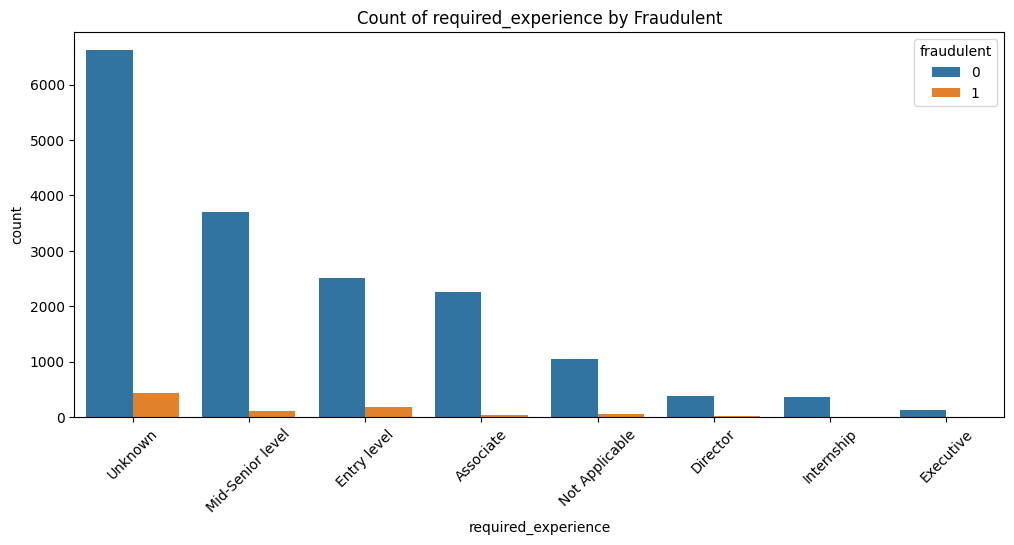

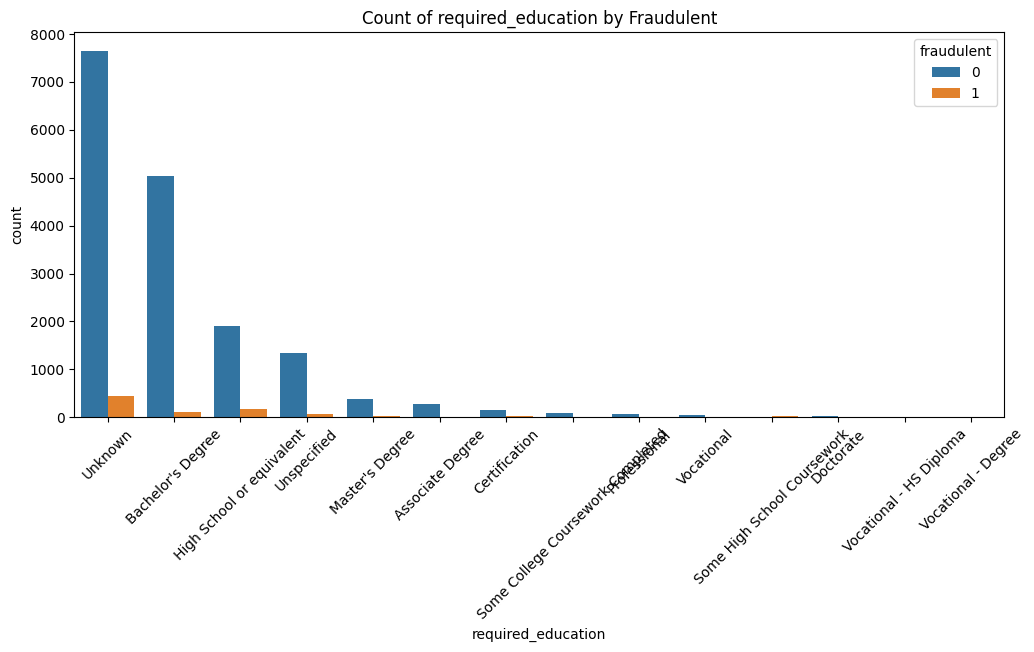

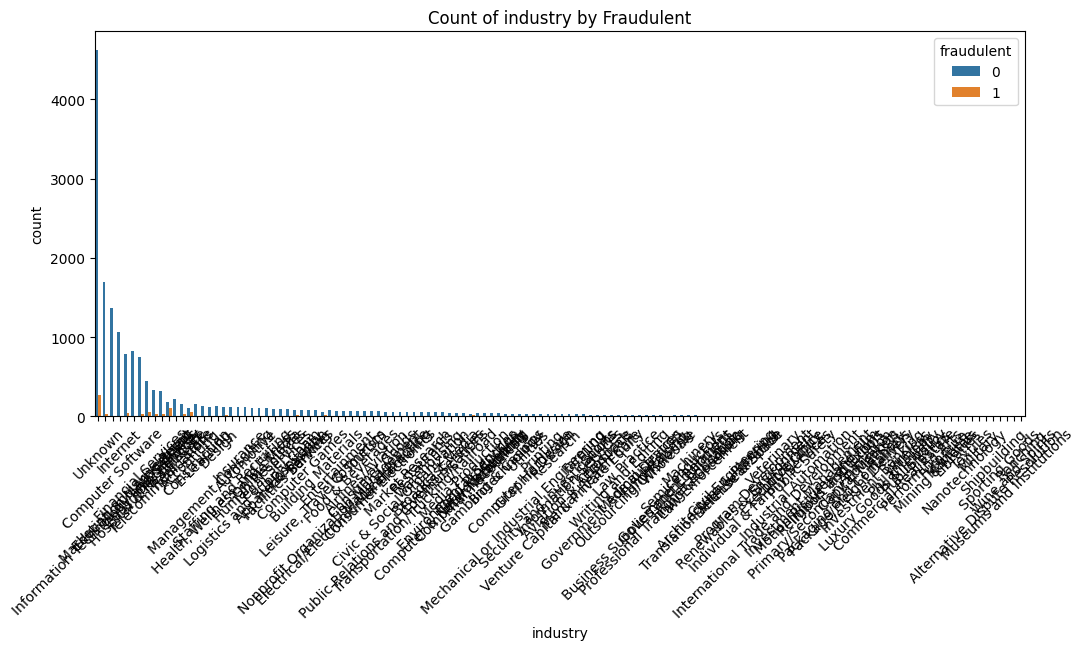

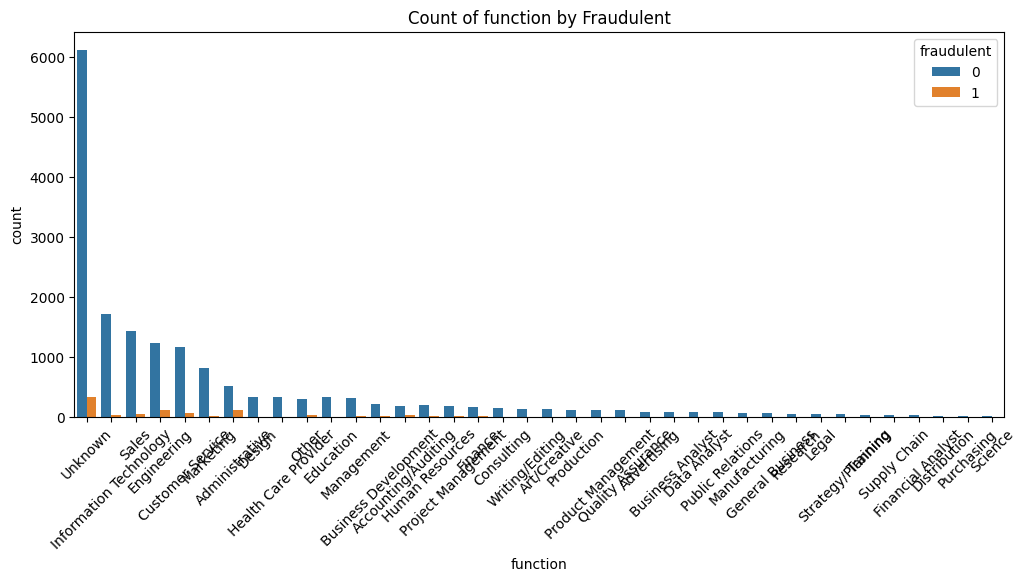

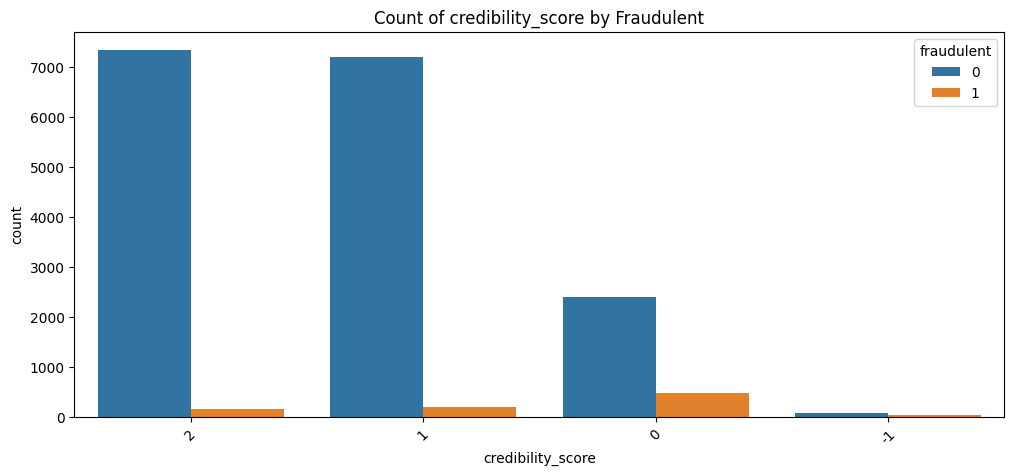

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['location', 'employment_type', 'required_experience', 
                    'required_education', 'industry', 'function', 'credibility_score']

for col in categorical_cols:
    plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=col, hue='fraudulent', order=df[col].value_counts().index)
    plt.title(f'Count of {col} by Fraudulent')
    plt.xticks(rotation=45)
    plt.show()


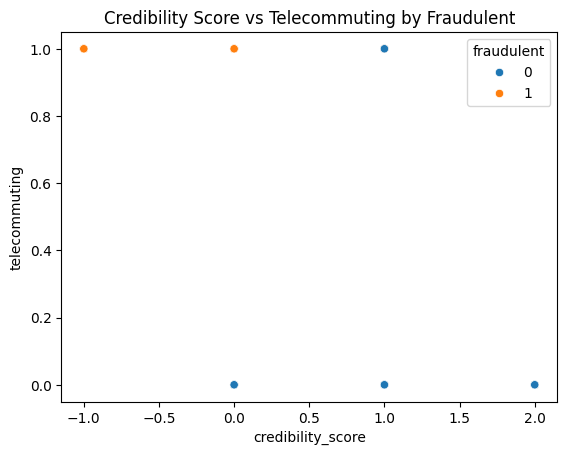

In [39]:
sns.scatterplot(data=df, x='credibility_score', y='telecommuting', hue='fraudulent')
plt.title('Credibility Score vs Telecommuting by Fraudulent')
plt.show()


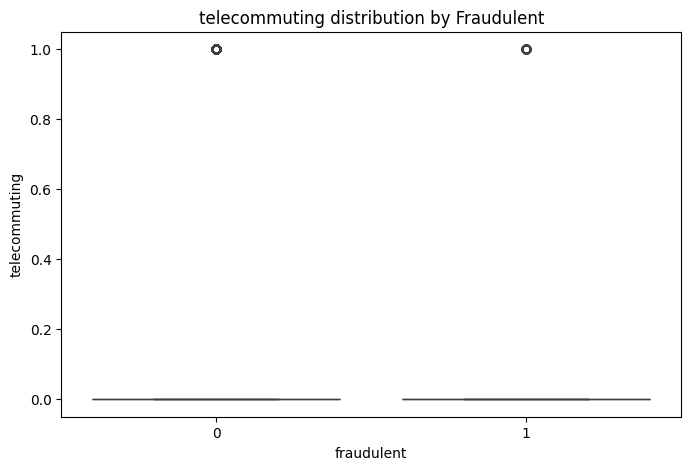

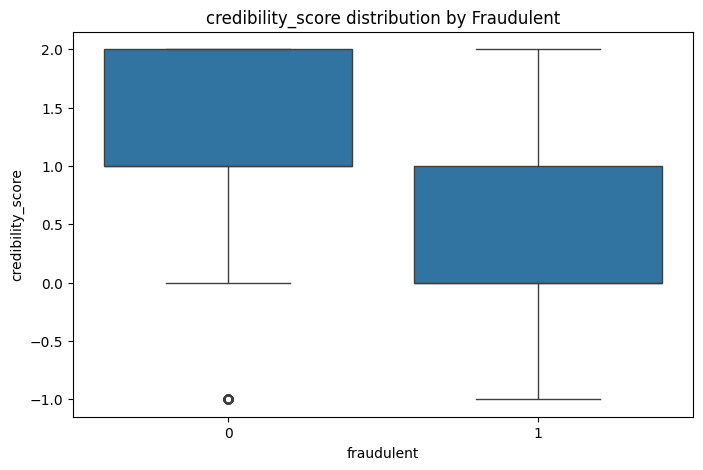

In [40]:
numeric_cols = ['telecommuting', 'credibility_score']  # add any numeric columns

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='fraudulent', y=col, data=df)
    plt.title(f'{col} distribution by Fraudulent')
    plt.show()


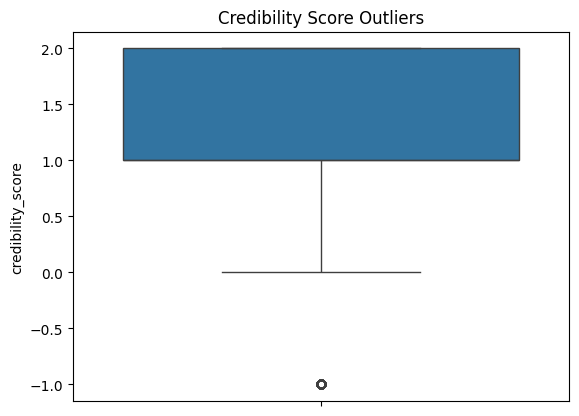

In [41]:
sns.boxplot(df['credibility_score'])
plt.title('Credibility Score Outliers')
plt.show()


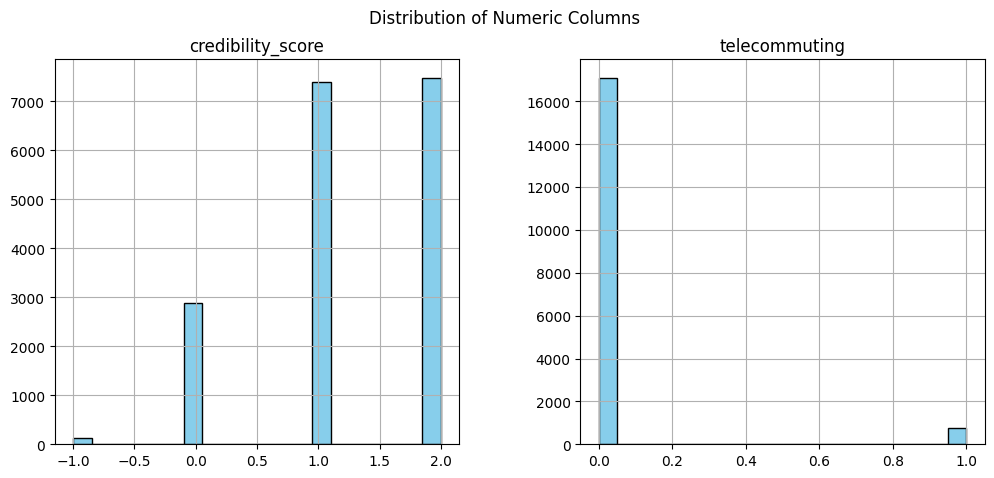

In [42]:
numeric_cols = ['credibility_score', 'telecommuting']  # add more numeric cols if needed

df[numeric_cols].hist(figsize=(12,5), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Columns')
plt.show()


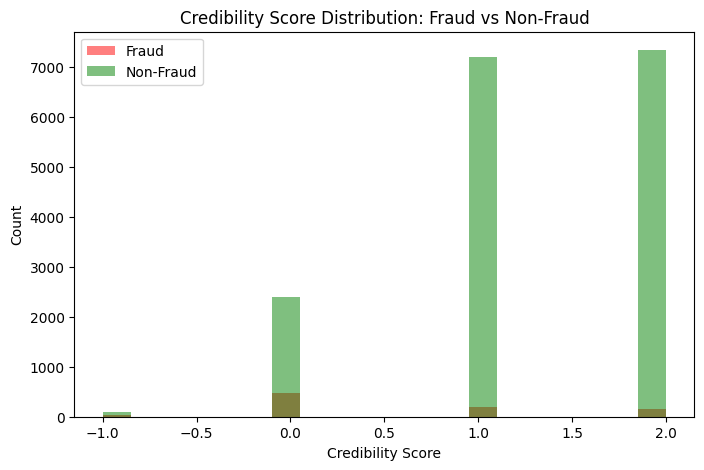

In [43]:
plt.figure(figsize=(8,5))
plt.hist(df[df['fraudulent']==1]['credibility_score'], bins=20, alpha=0.5, label='Fraud', color='red')
plt.hist(df[df['fraudulent']==0]['credibility_score'], bins=20, alpha=0.5, label='Non-Fraud', color='green')
plt.title('Credibility Score Distribution: Fraud vs Non-Fraud')
plt.xlabel('Credibility Score')
plt.ylabel('Count')
plt.legend()
plt.show()
# Higher credibility scores are mostly associated with genuine jobs,
# while lower scores contain more fraudulent listings, making this a useful predictive feature.


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   location             17880 non-null  object
 1   telecommuting        17880 non-null  int64 
 2   employment_type      17880 non-null  object
 3   required_experience  17880 non-null  object
 4   required_education   17880 non-null  object
 5   industry             17880 non-null  object
 6   function             17880 non-null  object
 7   fraudulent           17880 non-null  int64 
 8   text                 17880 non-null  object
 9   credibility_score    17880 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


In [45]:
df.head()

location  telecommuting employment_type required_experience  \
0    US, NY, New York              0           Other          Internship   
1      NZ, , Auckland              0       Full-time      Not Applicable   
2       US, IA, Wever              0         Unknown             Unknown   
3  US, DC, Washington              0       Full-time    Mid-Senior level   
4  US, FL, Fort Worth              0       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0            Unknown                    Unknown             Marketing   
1            Unknown  Marketing and Advertising      Customer Service   
2            Unknown                    Unknown               Unknown   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  \
0           0   
1           0   
2           0   
3           0   
4           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [46]:
cat_cols = ['location','employment_type','required_experience',
            'required_education','industry','function']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [47]:
df.columns

Index(['telecommuting', 'fraudulent', 'text', 'credibility_score',
       'location_AE, , Abudhabi', 'location_AE, , Dubai',
       'location_AE, , Media City | Dubai', 'location_AE, AZ, ',
       'location_AE, AZ, Abudhabi', 'location_AE, DU, ',
       ...
       'function_Purchasing', 'function_Quality Assurance',
       'function_Research', 'function_Sales', 'function_Science',
       'function_Strategy/Planning', 'function_Supply Chain',
       'function_Training', 'function_Unknown', 'function_Writing/Editing'],
      dtype='object', length=3302)

In [48]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
stop_words = set(stopwords.words('english'))  # fast lookup
lemmatizer = WordNetLemmatizer()


In [50]:
def normalize_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['text'] = df['text'].apply(normalize_text)

In [51]:
pd.set_option('display.max_colwidth', None)
print(df["text"].head())

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [52]:
df.dtypes


telecommuting                  int64
fraudulent                     int64
text                          object
credibility_score              int64
location_AE, , Abudhabi        uint8
                               ...  
function_Strategy/Planning     uint8
function_Supply Chain          uint8
function_Training              uint8
function_Unknown               uint8
function_Writing/Editing       uint8
Length: 3302, dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Columns: 3302 entries, telecommuting to function_Writing/Editing
dtypes: int64(3), object(1), uint8(3298)
memory usage: 56.8+ MB


In [54]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [55]:
df.dtypes

telecommuting                  int64
fraudulent                     int64
text                          object
credibility_score              int64
location_AE, , Abudhabi        uint8
                               ...  
function_Strategy/Planning     uint8
function_Supply Chain          uint8
function_Training              uint8
function_Unknown               uint8
function_Writing/Editing       uint8
Length: 3302, dtype: object

In [56]:
df['function_Design'].value_counts()

0    17540
1      340
Name: function_Design, dtype: int64

In [57]:
df.columns

Index(['telecommuting', 'fraudulent', 'text', 'credibility_score',
       'location_AE, , Abudhabi', 'location_AE, , Dubai',
       'location_AE, , Media City | Dubai', 'location_AE, AZ, ',
       'location_AE, AZ, Abudhabi', 'location_AE, DU, ',
       ...
       'function_Purchasing', 'function_Quality Assurance',
       'function_Research', 'function_Sales', 'function_Science',
       'function_Strategy/Planning', 'function_Supply Chain',
       'function_Training', 'function_Unknown', 'function_Writing/Editing'],
      dtype='object', length=3302)

In [58]:
# Numeric/categorical features
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
X_num = df.drop(columns=['text', 'fraudulent'])
y = df['fraudulent']

# Split train-test
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train model
model_num = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_num.fit(X_num_train, y_train)

print("Train score (numeric features):", model_num.score(X_num_train, y_train))
print("Test score (numeric features):", model_num.score(X_num_test, y_test))


Train score (numeric features): 0.9944071588366891
Test score (numeric features): 0.9513422818791947


In [59]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_num.predict(X_num_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3395
           1       0.52      0.56      0.54       181

    accuracy                           0.95      3576
   macro avg       0.75      0.77      0.76      3576
weighted avg       0.95      0.95      0.95      3576

[[3301   94]
 [  80  101]]


In [61]:
import pandas as pd

# Get importance scores
importances = model_num.feature_importances_

# Match with column names
feature_names = X_num.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort from most important to least
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

print(feat_imp.head(20))  # Top 10 important features


                                           Feature  Importance
1                                credibility_score    0.142687
3219                         industry_Oil & Energy    0.027489
2876                      location_US, TX, Houston    0.023585
3119          required_education_Bachelor's Degree    0.023451
3263                       function_Administrative    0.021331
3122  required_education_High School or equivalent    0.018021
3107                     employment_type_Full-time    0.015439
1580                    location_US, CA, San Mateo    0.014486
3116          required_experience_Mid-Senior level    0.013799
3127                    required_education_Unknown    0.013495
3274                          function_Engineering    0.013486
3153                    industry_Computer Software    0.013221
3298                              function_Unknown    0.012207
3118                   required_experience_Unknown    0.011865
3113               required_experience_Entry level    0

In [62]:
feature_importances = model_num.feature_importances_


In [63]:
feature_names = X_num.columns


In [64]:


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


In [65]:
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

feature_importance_df.head(20)


,Feature,Importance
1,credibility_score,0.142687
3219,industry_Oil & Energy,0.027489
2876,"location_US, TX, Houston",0.023585
3119,required_education_Bachelor's Degree,0.023451
3263,function_Administrative,0.021331
3122,required_education_High School or equivalent,0.018021
3107,employment_type_Full-time,0.015439
1580,"location_US, CA, San Mateo",0.014486
3116,required_experience_Mid-Senior level,0.013799
3127,required_education_Unknown,0.013495


In [66]:
important_features = feature_importance_df[
    feature_importance_df['Importance'] > 0.01
]['Feature']

X_reduced = X_num[important_features]


In [67]:
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)


In [68]:
from sklearn.ensemble import RandomForestClassifier

model_reduced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

model_reduced.fit(Xr_train, yr_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [69]:
print("FULL feature model")
print("Train:", model_num.score(X_num_train, y_train))
print("Test :", model_num.score(X_num_test, y_test))

print("\nREDUCED feature model")
print("Train:", model_reduced.score(Xr_train, yr_train))
print("Test :", model_reduced.score(Xr_test, yr_test))


FULL feature model
Train: 0.9944071588366891
Test : 0.9513422818791947

REDUCED feature model
Train: 0.8798937360178971
Test : 0.8604586129753915


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_reduced.predict(Xr_test)
print(classification_report(yr_test, y_pred))
print(confusion_matrix(yr_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.87      0.92      3395
           1       0.23      0.76      0.36       181

    accuracy                           0.86      3576
   macro avg       0.61      0.81      0.64      3576
weighted avg       0.95      0.86      0.89      3576

[[2939  456]
 [  43  138]]


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Numeric / categorical (already one-hot) features
X_num = df.drop(columns=['text', 'fraudulent'])
y = df['fraudulent']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.2, random_state=42, stratify=y
)

# Model
model_lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'   # important for fraud imbalance
)

# Train
model_lr.fit(X_train, y_train)

# Scores
print("Train score:", model_lr.score(X_train, y_train))
print("Test score :", model_lr.score(X_test, y_test))


Train score: 0.9049217002237137
Test score : 0.897930648769575


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3403
           1       0.04      0.14      0.07       173

    accuracy                           0.80      3576
   macro avg       0.50      0.49      0.48      3576
weighted avg       0.91      0.80      0.85      3576



In [73]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


TFIDF used 

In [74]:
X_text = df['text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)


In [75]:
tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [76]:
rf_text = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_text.fit(X_train_tfidf, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [77]:
y_pred = rf_text.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.58      0.74       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.86      3576
weighted avg       0.98      0.98      0.98      3576

[[3403    0]
 [  72  101]]


In [78]:
real_job = """
We are looking for a software engineer with 3+ years of experience.
Salary is competitive and interviews will be conducted officially.
"""

fake_job = """
Work from home. Earn 5000 dollars weekly.
No experience required. Pay registration fee now.
"""


In [79]:
real_vec = tfidf.transform([real_job])
fake_vec = tfidf.transform([fake_job])

print("Real job prediction:", rf_text.predict(real_vec))
print("Fake job prediction:", rf_text.predict(fake_vec))


Real job prediction: [0]
Fake job prediction: [1]


In [80]:
print("Real job probability:", rf_text.predict_proba(real_vec))
print("Fake job probability:", rf_text.predict_proba(fake_vec))


Real job probability: [[0.905 0.095]]
Fake job probability: [[0.385 0.615]]


In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [82]:
y_probs = model.predict_proba(X_test_tfidf)[:, 1]


In [83]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

best_threshold

0.7054283783574261

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_best = (y_probs >= best_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))



[[3380   23]
 [  34  139]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.86      0.80      0.83       173

    accuracy                           0.98      3576
   macro avg       0.92      0.90      0.91      3576
weighted avg       0.98      0.98      0.98      3576



In [85]:
rf_probs = rf_text.predict_proba(X_test_tfidf)[:, 1]


In [86]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, rf_probs)

f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
best_idx = np.argmax(f1_scores)
best_rf_threshold = thresholds[best_idx]

best_rf_threshold


0.34

In [87]:
rf_pred_custom = (rf_probs >= best_rf_threshold).astype(int)


In [88]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rf_pred_custom))
print(classification_report(y_test, rf_pred_custom))


[[3397    6]
 [  58  115]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.95      0.66      0.78       173

    accuracy                           0.98      3576
   macro avg       0.97      0.83      0.89      3576
weighted avg       0.98      0.98      0.98      3576



In [89]:
def augment_text_with_features(text):
    text_lower = text.lower()
    extra_tokens = []

    if 'company' not in text_lower:
        extra_tokens.append("missing_company")
    if 'no interview' in text_lower or 'resume shortlisting only' in text_lower:
        extra_tokens.append("no_interview")
    if any(phrase in text_lower for phrase in [
        'work with excel', 'prepare reports', 'any graduate', 'freshers welcome'
    ]):
        extra_tokens.append("generic_role")
    if 'immediate start' in text_lower:
        extra_tokens.append("immediate_start")

    return text + " " + " ".join(extra_tokens)


In [90]:
df["text"] = df["text"].apply(augment_text_with_features)


In [101]:
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["text"],
    df["fraudulent"],
    test_size=0.2,
    stratify=df["fraudulent"],
    random_state=42
)


In [102]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words="english"
)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

lr = LogisticRegression(
    class_weight="balanced",
    max_iter=1000
)

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [104]:
from sklearn.metrics import classification_report

print("RANDOM FOREST – TRAIN")
print(classification_report(y_train, rf.predict(X_train)))

print("RANDOM FOREST – TEST")
print(classification_report(y_test, rf.predict(X_test)))

print("\nLOGISTIC REGRESSION – TRAIN")
print(classification_report(y_train, lr.predict(X_train)))

print("LOGISTIC REGRESSION – TEST")
print(classification_report(y_test, lr.predict(X_test)))



RANDOM FOREST – TRAIN


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

RANDOM FOREST – TEST
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.57      0.73       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.86      3576
weighted avg       0.98      0.98      0.98      3576


LOGISTIC REGRESSION – TRAIN
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     13611
           1       0.66      1.00      0.79       693

    accuracy                           0.97     14304
   macro avg       0.83      0.98      0.89     14304
weighted avg       0.98 

In [99]:
print("Random Forest Confusion Matrix")
print(confusion_matrix(y, rf_pred))

print("\nLogistic Regression Confusion Matrix")
print(confusion_matrix(y, lr_pred))


Random Forest Confusion Matrix
[[17014     0]
 [    0   866]]

Logistic Regression Confusion Matrix
[[16544   470]
 [    2   864]]


In [105]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("TRAINING PERFORMANCE")
print(classification_report(y_train, y_train_pred))

print("TEST PERFORMANCE")
print(classification_report(y_test, y_test_pred))


TRAINING PERFORMANCE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.57      0.73       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.86      3576
weighted avg       0.98      0.98      0.98      3576



In [106]:
# ===== SAVE FINAL MODEL & VECTORIZER =====
import pickle

with open("fraud_model.pkl", "wb") as f:
    pickle.dump(lr, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model and TF-IDF vectorizer saved successfully!")


Model and TF-IDF vectorizer saved successfully!


In [ ]:
# ===================== PROJECT SUMMARY (INTERVIEW NOTES) =====================

# 1. Problem Statement
# Goal: Detect fraudulent (fake) job postings.
# This is a binary classification problem with HIGHLY IMBALANCED data.
# Fraudulent jobs (minority class) are rare but critical to detect.

# 2. Data Preprocessing
# - Text fields (title, description, requirements, etc.) are combined
#   to capture complete job context.
# - Text normalization (lowercasing, whitespace removal) improves consistency.
# - Boolean columns are converted to integers (True → 1, False → 0)
#   so that ML models can process them.
# - Columns with very high missing values (e.g., salary_range) are dropped.

# 3. Feature Engineering
# - TF-IDF is used to convert text into numerical features.
# - TF-IDF captures important words while down-weighting very common ones.
# - Structured features (has_company_logo, telecommuting, etc.)
#   are combined with text-based features.

# 4. Model Selection
# - Multiple models were trained (Logistic Regression, Random Forest).
# - Logistic Regression performed better in terms of recall for the fraud class.
# - Random Forest had higher precision but missed more fake jobs.

# 5. Why Recall is Prioritized
# - Fraud detection focuses on minimizing False Negatives.
# - Missing a fake job (FN) is more harmful than flagging a real job (FP).
# - Recall tells us how many actual fake jobs are correctly detected.
# - Therefore, recall for the minority class (fraud) is more important than accuracy.

# 6. Class Imbalance Handling
# - Dataset is heavily skewed toward real jobs.
# - Accuracy is misleading in imbalanced datasets.
# - Model performance is evaluated using precision, recall, F1-score,
#   and confusion matrix instead of accuracy alone.
# - SMOTE is considered but used cautiously to avoid introducing noisy samples.

# 7. Final Model Choice
# - Logistic Regression is selected for deployment
#   due to better recall and simpler, more stable behavior.
# - Threshold tuning can further improve recall if needed.

# 8. Model Persistence (Deployment Ready)
# - Trained TF-IDF vectorizer and model are saved using pickle/joblib.
# - Saving both ensures consistency between training and inference.
# - These files are later loaded in a Python (.py) file for deployment.
#“Although Random Forest had higher precision, it showed lower recall for fraudulent jobs. Since the cost of missing a fake job is higher, Logistic Regression was preferred.”

# ============================================================================ 
